# Taller análisis no supervisado de texto

Este taller es una práctica relacionada al análisis no supervisado de texto utilizando técnicas de clustering, se abordarán los siguientes temas:

* K-means.
* Hierarchical clustering.

En este caso utilizaremos un dataset de noticias de la BBC disponible en: https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification/downloads/bbc-full-text-document-classification.zip/1

Este conjunto de datos contine etiqueta (tipo de noticia), por lo que se quitará la etiqueta para realizar los ejercicios de agrupación. La etiqueta sólo será usada con fines de validación.

In [1]:
import os, re, nltk, glob
import numpy as np
np.random.seed(0)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/juan.gama/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Creamos el corpus como un subconjunto del dataset
path = '../Files/bbc_dataset/bbc_fulltext/'
corpus=[]; news_number=[]; news_name=[]
# Iteramos para todos los tipos de noticias
for i, ntype in enumerate(["tech/","sport/","politics/","entertainment/","business/"]):
    # Seleccionamos sólo 100 noticias por cada tipo
    for doc in os.listdir(f'{path}{ntype}')[:100]:
        # Cargamos cada noticia y sus respectivas etiquetas
        with open( f'{path}{ntype}{doc}',"r") as file:
            corpus.append(file.read())
            news_number.append(i)
            news_name.append(ntype[:-1])

## 1. Preprocesamiento

Cree una función para el preprocesamiento del corpus, esta función debe dejar todas las palabras en minúscula, eliminar caracteres especiales, signos de puntuación, stopwords y palabras de longitud menor o igual a 2.

***Nota: el dataset se encuentra en la variable corpus y el tipo de la noticia se encuentra en la variable news_number (numérico) y news_name (string).***

In [3]:
from nltk.corpus import stopwords
from nltk import word_tokenize

In [32]:
# Debe completar la siguiente función, esta función recibe como argumento
# un documento "doc" (en este caso es cualquier noticia) y debe retornar
# el documento preprocesado
reg = re.compile(r'[A-Za-z\d\.,\'\s-]+')
def preprocessing(doc):
    document = doc.lower()
    document = ' '.join(reg.findall(document))
    tokens = word_tokenize(document)
    tokens = [t for t in tokens if t not in stopwords.words('english') and len(t) > 2]

    return tokens
# El siguiente comando aplica la función a todo el corpus
norm_corpus = list(map(preprocessing,corpus))
norm_corpus = np.array(norm_corpus)

## 2. Representación de los textos

Construya una representación Word2Vec con los parámetros específicados. Un documento debe representarse como el promedio de la representación vectorial de los términos que lo componen.

In [33]:
from gensim.models import Word2Vec

w2v_model = Word2Vec(norm_corpus, size=100, window=5, min_count=1, workers=4, sample=1e-3)
w2v_model

In [34]:
def to_vect(t):
    if t in w2v_model:
        return w2v_model[t]
    return np.zeros(w2v_model.vector_size, dtype=np.float32)

def w2v_repr1(doc_tokenized):
    if len(doc_tokenized) == 0:
        return np.zeros(w2v_model.vector_size, dtype=np.float32)
    
    vectors = np.array([to_vect(t) for t in doc_tokenized])
    return vectors.mean(axis=0)

In [35]:
vec_corpus = list(map(w2v_repr1, norm_corpus))
vec_corpus = np.array(vec_corpus)
vec_corpus[0]

array([ 0.18172757,  0.22610494,  0.22343263,  0.06632514,  0.16685817,
        0.00558094, -0.57221407,  0.47567102,  0.17908406,  0.28732994,
        0.25587395,  0.0326292 , -0.04338951, -0.32009187, -0.2310065 ,
       -0.05130558,  0.1948131 ,  0.32558945,  0.25890085, -0.02137413,
        0.06953131,  0.13189884,  0.37774155,  0.28756455, -0.37429276,
       -0.0094959 ,  0.33244416, -0.16432026,  0.26535314,  0.05506665,
       -0.10013904, -0.23184156,  0.15210244,  0.21905161,  0.32681772,
       -0.30101243, -0.62848085, -0.13871945,  0.5240249 , -0.05314396,
        0.24907699, -0.19059703, -0.14675017, -0.21208744,  0.14486359,
       -0.22316375,  0.35239914, -0.56285655,  0.08160336,  0.1108649 ,
       -0.04048692, -0.32383135,  0.0276382 , -0.04483173, -0.05928943,
       -0.43608156,  0.07477265,  0.43828416, -0.2932598 ,  0.43924153,
        0.28805855,  0.07170331,  0.15206641, -0.05544393,  0.23664743,
       -0.0121012 ,  0.15720506, -0.05899292,  0.4991861 ,  0.27

## 3. K-means

Entrene un modelo K-means con la representación de los documentos, realice una exploración del parámetro $K$ en el rango $[3,40]$. Seleccione un valor apropiado (utilizando el método del codo [elbow](https://towardsdatascience.com/clustering-metrics-better-than-the-elbow-method-6926e1f723a6). Para obtener la pérdida del modelo K-means puede utilizar la propiedad inertia_ del modelo entrenado [K-means documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)) y argumente su decisión.

**Una vez seleccionado el k óptimo entrene el módelo con el k óptimo y utilizelo en el siguiente punto.**

In [8]:
from sklearn.cluster import KMeans

In [36]:
# ====================================================================
#                     Exploración del parámetro K
# ====================================================================
results = np.zeros(37)
for k in range(3,40):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(vec_corpus)
    results[k-3] = kmeans.inertia_

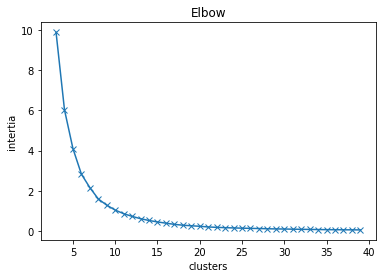

In [37]:
# ====================================================================
#               Gráfica de K contra la pérdida de K-means
# ====================================================================
plt.plot(range(3, 40), results, 'x-')
plt.xlabel('clusters')
plt.ylabel('intertia')
plt.title('Elbow')
plt.show()

In [38]:
# ===================================================================================================
#                Entrene un modelo K-means utilizando el k óptimo encontrado en la celda anterior
# ===================================================================================================
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(vec_corpus)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

## 4. Análisis de K-means

Construya una nube de palabras (con WordCloud) y encuentre la distribución de los distintos tipos de noticias (histograma de frequencia de cata tipo de noticia) por cada uno de los 3 primeros clusters \[cluster0, cluster1, cluster2\] (si los hay).

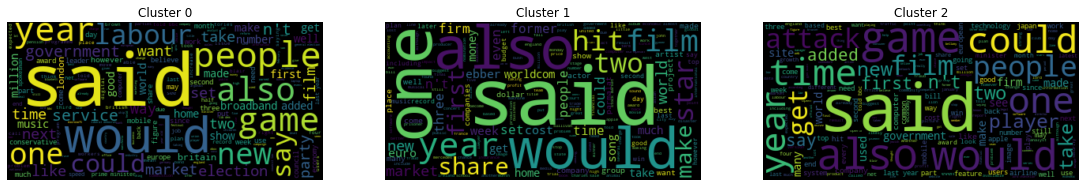

In [51]:
# ====================================================================
#                           Nube de palabras
# ====================================================================
from wordcloud import WordCloud
import itertools

plt.figure(figsize=(19.2, 4.8))
for label in range(min(kmeans.n_clusters, 3)):
    documents = norm_corpus[kmeans.labels_ == label]
    documents = list(itertools.chain(*documents))
    joined_text = ' '.join(documents)
    img = WordCloud(stopwords=stopwords.words("english")).generate(joined_text)
    
    plt.subplot(131 + label)
    plt.imshow(img, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Cluster {label}")

## 5. Hierarchical Clustering

Construya un dendograma utilizando hierarchical clustering (utilize las funciones se scipy [ward](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.ward.html#scipy.cluster.hierarchy.ward) y [dendogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram)) con similitud coseno (utilice la función de scikit-learn [cosine similarity](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html)). Discuta los resultados.

***Nota: utilice el corpus completo y muestre 500 puntos.***

In [66]:
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.metrics.pairwise import cosine_similarity
# ====================================================================
#                          Modelo Jerárquico
# ====================================================================
diststances = cosine_similarity(vec_corpus)

linkage_matrix = ward(diststances)

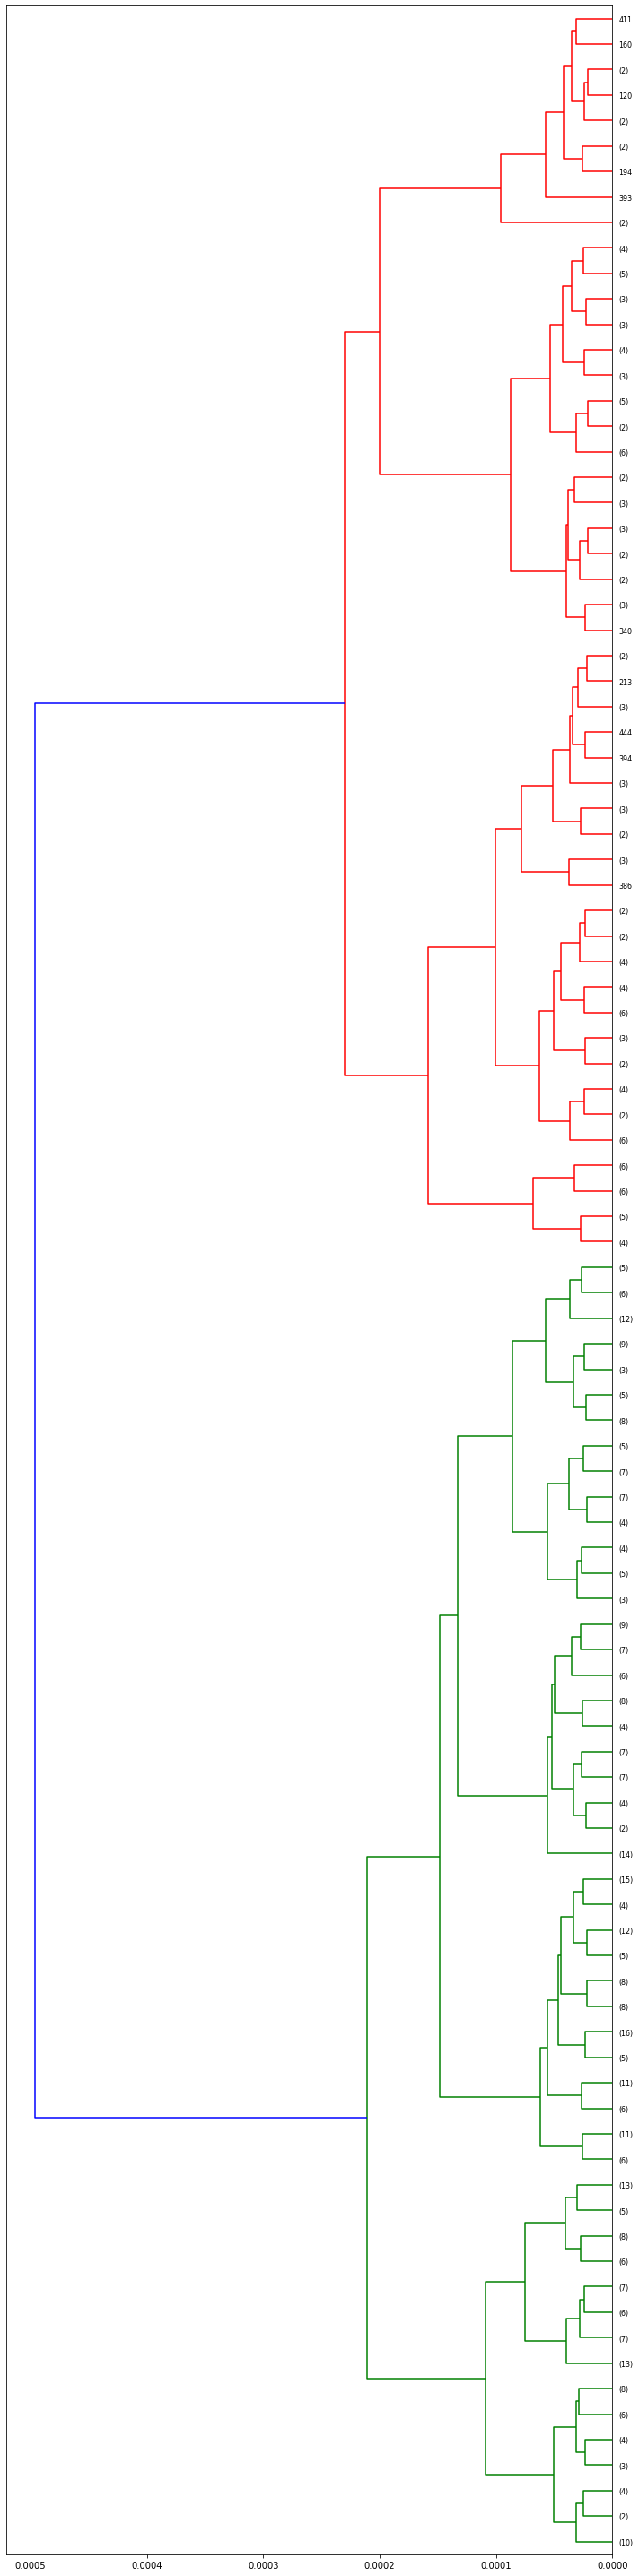

In [67]:
# ====================================================================
#                             Dendograma
# ====================================================================
fig, ax = plt.subplots(figsize=(10,40))
ax = dendrogram(linkage_matrix, truncate_mode='lastp', orientation="left", p=100, leaf_font_size=8.)
plt.tight_layout()

Entrene un modelo jerárquico (Utilize el modelo de scikit-learn [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html), con el parámetro linkage="ward") para agrupar los datos en 5 clusters (fije el parámetro n_clusters=5 del modelo AffinityPropagation), obtenga las predicciones y utilice la función dada para comparar cada cluster con las etiquetas originales. Discuta los resultados

In [69]:
# ====================================================================
#                   Modelo Jerárquico de sklearn
# ====================================================================
#                       Ingrese su código aquí
# Guarde en esta variable los labels predichos por el algoritmo de clustering.
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(linkage='ward', n_clusters=5).fit(vec_corpus)

preds = clustering.labels_

In [70]:
# Función para comparar los clusters encontrados con las etiquetas originales
# ************** Por favor no modifique esta celda ************************
import seaborn as sns
from sklearn.metrics import confusion_matrix
def con_matrix(preds):
    con_mat=confusion_matrix(news_number,preds)
    sns.heatmap(con_mat,square=True,annot=True,cbar=False,
                xticklabels=["cluster {}".format(i) for i in range(5)],
                yticklabels=["tech","sport","politics","entertainment","business"])
    plt.xlabel("Predicción")
    plt.ylabel("Valor real")
    plt.title("Confusion Matrix")

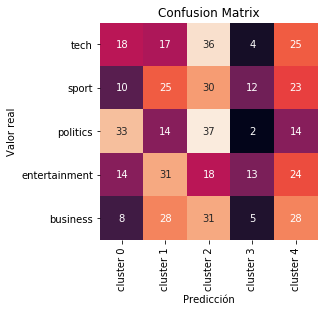

In [71]:
# Use la función con los clusters encontrados (preds)
con_matrix(preds)